# Regression Analysis

#### Usual library imports first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preproc
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

#### Load mtcars dataset

In [2]:
mtcars = sm.datasets.get_rdataset('mtcars').data
mtcars.sample(4)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.60,0,1,5,8
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.60,0,0,3,3
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


In [3]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

#### Split dataset between X (features, or predictors) and y (target)

In [4]:
y = mtcars.mpg.values

# sm.add_constant adds a column to the dataframe with 1.0 as a constant
features = mtcars.iloc[:,1:]
X = sm.add_constant(features)

/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
print(mtcars.shape)
print(X.shape)
print(features.shape)

(32, 11)
(32, 11)
(32, 10)


#### Build model and obtain summary

In [6]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           3.79e-07
Time:                        23:13:49   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Perform predictions

In [7]:
model.predict(X)

Mazda RX4              22.599506
Mazda RX4 Wag          22.111886
Datsun 710             26.250644
Hornet 4 Drive         21.237405
Hornet Sportabout      17.693434
Valiant                20.383039
Duster 360             14.386256
Merc 240D              22.496012
Merc 230               24.419090
Merc 280               18.699030
Merc 280C              19.191654
Merc 450SE             14.172162
Merc 450SL             15.599574
Merc 450SLC            15.742225
Cadillac Fleetwood     12.034013
Lincoln Continental    10.936438
Chrysler Imperial      10.493629
Fiat 128               27.772906
Honda Civic            29.896739
Toyota Corolla         29.512369
Toyota Corona          23.643103
Dodge Challenger       16.943053
AMC Javelin            17.732181
Camaro Z28             13.306022
Pontiac Firebird       16.691679
Fiat X1-9              28.293469
Porsche 914-2          26.152954
Lotus Europa           27.636273
Ford Pantera L         18.870041
Ferrari Dino           19.693828
Maserati B

In [8]:
model

In [9]:
preds = pd.DataFrame(model.predict(X), index = list(mtcars.index), columns = ['pred'])

compare = pd.DataFrame(mtcars['mpg'])
compare['pred'] = preds.pred
compare['difference'] = compare.mpg - compare.pred

compare


,mpg,pred,difference
Mazda RX4,21.0,22.599506,-1.599506
Mazda RX4 Wag,21.0,22.111886,-1.111886
Datsun 710,22.8,26.250644,-3.450644
Hornet 4 Drive,21.4,21.237405,0.162595
Hornet Sportabout,18.7,17.693434,1.006566
Valiant,18.1,20.383039,-2.283039
Duster 360,14.3,14.386256,-0.086256
Merc 240D,24.4,22.496012,1.903988
Merc 230,22.8,24.419090,-1.619090
Merc 280,19.2,18.699030,0.500970


In [10]:
round(compare.difference.describe(),3)

count    32.000
mean      0.000
std       2.181
min      -3.451
25%      -1.604
50%      -0.120
75%       1.219
max       4.627
Name: difference, dtype: float64

***
## Assessing the regression model

#### 1. Standard Error of Regression

The standard error of regression takes into account the degrees of freedom lost due to the number of regressors in the model, and the number of observations the model is based on.  It it considered a more accurate representation of the standard error of regression.

In [11]:
# Calculated as:
model.mse_resid**.5

2.6501970278655076

In [12]:
# Also as:
np.sqrt(np.sum(model.resid**2)/model.df_resid)

2.6501970278655076

In [13]:
# Also calculated directly from the model as
model.scale**.5

2.6501970278655076

`model.resid` is the residuals, and `model.df_resid` is the degrees of freedom for the model residuals

In [14]:
model.df_resid

21.0

#### 2. Goodness of fit, R-squared

##### R-squared is the square of the correlation betweeen actual and predicted values

In [15]:
round(compare.corr()**2, 6)

,mpg,pred,difference
mpg,1.000000,0.869016,0.130984
pred,0.869016,1.000000,0.000000
difference,0.130984,0.000000,1.000000


#### Root mean squared error  
The RMSE is just the square root of the average squared errors.  It is the same as if we had calculated the population standard deviation based on the residuals.

RMSE is normally calculated for the test set, because for the training data we have the standard error of regression.

In [16]:
mean_squared_error(compare.pred, compare.mpg) **.5

2.1469049671609435

### 3. Understanding the F-statistic, and its p-value

In [17]:
# F stat=  (explained variance) / (unexplained variance)
# F stat = (ESS/DFM) / (RSS/DFE)
(model.ess/model.df_model) / (np.sum(model.resid**2)/model.df_resid)


13.932463690208843

In [18]:
# p value for F stat
import scipy
1-(scipy.stats.f.cdf(model.fvalue, model.df_model, model.df_resid))

3.7931521057466e-07

In [19]:
# Getting f value directly from statsmodels
model.fvalue

13.932463690208843

In [20]:
# Getting the p value of the f statistic directly from statsmodels
model.f_pvalue

3.793152105305839e-07

##### Degrees of freedom

In [21]:
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
# Deg Fdm for Model, p-1, where p is number of regressors
dfm = model.df_model

In [22]:
# n-p, Deg Fdm for Errors, where n is number of observations, and p is number of regressors
model.df_resid

21.0

#### ESS, TSS and RSS calculations

In [23]:
y=mtcars.mpg.values
RSS = np.sum(model.resid**2)
TSS = np.sum((y - np.mean(y))**2)
ESS= model.ess
R_sq = 1 - RSS / TSS
print(R_sq)
print('RSS', RSS,'\nESS', model.ess, '\nTSS',  TSS)
print('ESS+RSS=',RSS+model.ess)
print('F value', ESS/(RSS/(30)))
print('ESS/TSS=', ESS/TSS)

0.8690157644777647
RSS 147.4944300166506 
ESS 978.5527574833493 
TSS 1126.0471874999998
ESS+RSS= 1126.0471874999998
F value 199.035195574412
ESS/TSS= 0.8690157644777647


In [24]:
compare.corr()**2

,mpg,pred,difference
mpg,1.000000,8.690158e-01,1.309842e-01
pred,0.869016,1.000000e+00,2.511002e-27
difference,0.130984,2.511002e-27,1.000000e+00


#### 4. Plot the Residuals

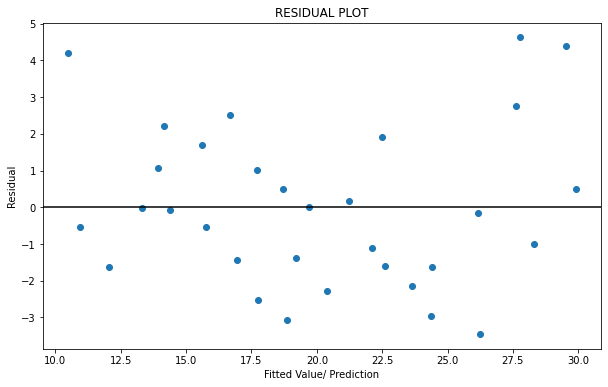

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(compare.pred,model.resid)
plt.axhline(0, color='black')
plt.xlabel('Fitted Value/ Prediction')
plt.ylabel('Residual')
plt.title('RESIDUAL PLOT');

##### Perform the Breusch-Pagan test for testing whether heteroscedasticity is present

In [26]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(model.resid, model.model.exog)
print(list(zip(names, test)),'\n')
if test[3]>.05:
    print('p-value is', round(test[3], 4), 'which is greater than 0.05.  Hence we fail to reject \
                                            the null hypothesis (H0): Homoscedasticity is present, \
                                            and conclude that the data has homoscedasticity.')
else:
    print('p-value is', round(test[3], 4), 'which is less than 0.05.  Hence we accept the alternate \
                                            hypothesis, alternative hypothesis: (Ha): Homoscedasticity \
                                            is not present (i.e. heteroscedasticity exists)')

[('Lagrange multiplier statistic', 14.913588960622409), ('p-value', 0.13524415065664627), ('f-value', 1.8329499825990316), ('f p-value', 0.11634584353912343)] 

p-value is 0.1163 which is greater than 0.05.  Hence we fail to reject                                             the null hypothesis (H0): Homoscedasticity is present,                                             and conclude that the data has homoscedasticity.


***
### Lasso and Ridge Regression

##### L1 norm

In [27]:
np.linalg.norm([2,3], 1)

5.0

In [28]:
# same as sum of all elements
2 + 3

5

##### L2 norm

In [29]:
np.linalg.norm([2,3], 2)

3.605551275463989

In [30]:
# same as the root of the sum of squares of the elements
np.sqrt(2**2 + 3**2)

3.605551275463989

#### Peforming Lasso and Ridge regression

In [31]:
model_reg = sm.regression.linear_model.OLS(y,X).fit_regularized(alpha = 1, L1_wt = .1, refit=True)

In [32]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     18.00
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           2.62e-08
Time:                        23:13:50   Log-Likelihood:                -73.602
No. Observations:                  32   AIC:                             163.2
Df Residuals:                      25   BIC:                             174.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
cyl                 0          0        nan        nan           0           0
disp          -0.0093      0.010     -0.979      0.337      -0.029       0.010
hp            -0.0025      0.020     -0.125      0.901      -0.043       0.038
drat           2.0389      1.482      1.376      0.181      -1.014       5.091
wt                  0          0        nan        nan           0           0
qsec           0.6674      0.272      2.456      0.021       0.108       1.227
vs                  0          0        nan        nan           0           0
am             3.1923      1.992      1.603      0.122      -0.910       7.294
gear           1.6071      1.359      1.183      0.248      -1.192       4.406
carb          -1.3805      0.573     -2.410      0.024      -2.560      -0.201
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.467
Skew:                          -0.070   Prob(JB):                        0.792
Kurtosis:                       2.425   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
pd.DataFrame({'model': model.params, 
              'model_reg': model_reg.params})

,model,model_reg
const,12.303374,0.000000
cyl,-0.111440,0.000000
disp,0.013335,-0.009334
hp,-0.021482,-0.002483
drat,0.787111,2.038859
wt,-3.715304,0.000000
qsec,0.821041,0.667390
vs,0.317763,0.000000
am,2.520227,3.192283
gear,0.655413,1.607129


In [34]:
mean_squared_error(model_reg.predict(X), y)

5.825422019252034

In [35]:
model_reg.params

array([ 0.00000000e+00,  0.00000000e+00, -9.33429540e-03, -2.48251056e-03,
        2.03885853e+00,  0.00000000e+00,  6.67389918e-01,  0.00000000e+00,
        3.19228288e+00,  1.60712882e+00, -1.38047254e+00])

***
## Polynomial Features

We first need to 'fit' polynomial features to data which in our case is `X`, and store this 'fit' in a variable we call, say `p_X`.  We can then transform any input to the polynomial feature set using `transform()`.  
  
[Throughout our modeling journey, we will often see a difference between the fit and the transform methods.  `fit` creates the mechanism, `transform` implements it.  Sometimes these operations are combined in a single step using `fit_transform()`.  What we do depends upon our use case.]  
  
The `PolynomialFeatures` function automatically inserts a constant, so if we use our `X` as an input, we will get the constant term twice (as we had added a constant earlier using `add_constant`).  So we will use `features` instead of `X`.


### Polynomial Features Example


 LinregressResult(slope=0.001312620315650887, intercept=0.5984710661055463, rvalue=0.002831659590515802, pvalue=0.9844291170707569, stderr=0.0669076410894747) 




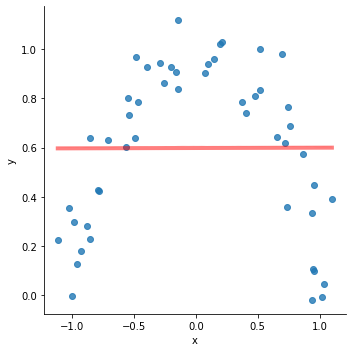

In [36]:
# Why Polynomial Regression?

df, labels = datasets.make_moons(noise=.1)
df = pd.DataFrame(df, columns = ['x', 'y'])
df['label'] = labels
df = df[df.label == 0]
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":4,"alpha": .5, "color":"red"},ci=1)
print('\n', stats.linregress(x = df['x'], y = df['y']),'\n\n')

In [37]:
# Explaining polynomial features with a random example

from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

data = pd.DataFrame.from_dict({
    'x1': np.random.randint(low=1, high=10, size=5),
    'x2': np.random.randint(low=1, high=10, size=5),
    'y': np.random.randint(low=1, high=10, size=5)
})
print('Dataset is:\n', data)
feat = data.iloc[:,:2].copy()
p = PolynomialFeatures(degree=2, interaction_only=False).fit(feat)
print('\nPolynomial and Interaction Feature names are:\n', 
      p.get_feature_names(feat.columns))


Dataset is:
    x1  x2  y
0   3   7  8
1   3   2  1
2   9   9  4
3   1   4  1
4   5   3  6

Polynomial and Interaction Feature names are:
 ['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2']


In [38]:
features = pd.DataFrame(p.transform(feat), 
                        columns=p.get_feature_names(feat.columns))
print(features)

     1   x1   x2  x1^2  x1 x2  x2^2
0  1.0  3.0  7.0   9.0   21.0  49.0
1  1.0  3.0  2.0   9.0    6.0   4.0
2  1.0  9.0  9.0  81.0   81.0  81.0
3  1.0  1.0  4.0   1.0    4.0  16.0
4  1.0  5.0  3.0  25.0   15.0   9.0



#### Calculating polynomial features for mtcars

In [39]:
mtcars = sm.datasets.get_rdataset('mtcars').data
y = mtcars.mpg.values
features = mtcars.iloc[:,1:]

In [40]:
poly = PolynomialFeatures(degree=2, interaction_only=False).fit(features)

In [41]:
p_X = pd.DataFrame(poly.transform(features), columns=poly.get_feature_names(features.columns))
p_X.head()

,1,cyl,disp,hp,drat,wt,qsec,vs,am,gear,...,vs^2,vs am,vs gear,vs carb,am^2,am gear,am carb,gear^2,gear carb,carb^2
0,1.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,4.0,4.0,16.0,16.0,16.0
1,1.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,4.0,4.0,16.0,16.0,16.0
2,1.0,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,...,1.0,1.0,4.0,1.0,1.0,4.0,1.0,16.0,4.0,1.0
3,1.0,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,3.0,1.0
4,1.0,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,4.0


In [42]:
print(poly.get_feature_names(features.columns))

['1', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'cyl^2', 'cyl disp', 'cyl hp', 'cyl drat', 'cyl wt', 'cyl qsec', 'cyl vs', 'cyl am', 'cyl gear', 'cyl carb', 'disp^2', 'disp hp', 'disp drat', 'disp wt', 'disp qsec', 'disp vs', 'disp am', 'disp gear', 'disp carb', 'hp^2', 'hp drat', 'hp wt', 'hp qsec', 'hp vs', 'hp am', 'hp gear', 'hp carb', 'drat^2', 'drat wt', 'drat qsec', 'drat vs', 'drat am', 'drat gear', 'drat carb', 'wt^2', 'wt qsec', 'wt vs', 'wt am', 'wt gear', 'wt carb', 'qsec^2', 'qsec vs', 'qsec am', 'qsec gear', 'qsec carb', 'vs^2', 'vs am', 'vs gear', 'vs carb', 'am^2', 'am gear', 'am carb', 'gear^2', 'gear carb', 'carb^2']


Now `p_X` contains our data frame with the polynomial features.  From this point, we do our regression the normal way.

In [43]:
model_poly = sm.OLS(y, p_X).fit()
print('R-squared is:')
model_poly.rsquared

R-squared is:


1.0

#### Perform predictions

In [44]:
preds = pd.DataFrame({'PolynomialPred': model_poly.predict(p_X)}, columns = ['PolynomialPred'])

In [45]:
preds.index = mtcars.index
compare2 = pd.DataFrame(mtcars['mpg'])
compare2['PolynomialPred'] = preds.PolynomialPred
compare2['difference'] = compare2.mpg - compare2.PolynomialPred

compare2

,mpg,PolynomialPred,difference
Mazda RX4,21.0,21.0,5.684342e-14
Mazda RX4 Wag,21.0,21.0,1.136868e-13
Datsun 710,22.8,22.8,6.053824e-12
Hornet 4 Drive,21.4,21.4,1.392664e-11
Hornet Sportabout,18.7,18.7,-4.416023e-12
Valiant,18.1,18.1,-2.131628e-13
Duster 360,14.3,14.3,-2.128075e-12
Merc 240D,24.4,24.4,8.597567e-13
Merc 230,22.8,22.8,1.740830e-13
Merc 280,19.2,19.2,-6.146195e-13


***
## Logistic Regression

#### Load the data

In [46]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv('diabetes.csv')

#### Review the data

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


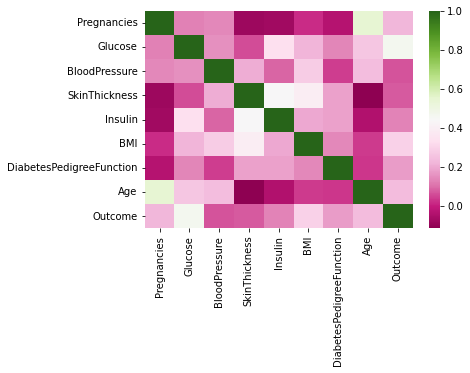

In [50]:
sns.heatmap(df.corr(), cmap="PiYG");

#### Prepare the data, and perform a train-test split

In [51]:
# Columns 0 to 8 are our predictors, or features
X = df.iloc[:,:8]

# Standard scale the features
X = pd.DataFrame(preproc.StandardScaler().fit_transform(X))

# Add the intercept term/constant
X = sm.add_constant(X)

# The last column is our y variable, the target
y = df.Outcome

# Now we are ready to do the train-test split 75-25, with random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
X.columns

Index(['const', 0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

In [53]:
X_train

,const,0,1,2,3,4,5,6,7
118,1.0,0.046014,-0.747831,-0.470732,0.154533,-0.692891,-0.481351,-0.087210,-0.956462
205,1.0,0.342981,-0.309671,0.149641,0.468173,-0.692891,-1.027104,-0.195934,-0.531023
506,1.0,-1.141852,1.849832,1.080200,0.342717,0.088570,0.572079,-0.476805,0.149679
587,1.0,0.639947,-0.560048,-0.160546,-1.288212,-0.692891,-0.976336,-0.673113,-0.360847
34,1.0,1.827813,0.034598,0.459827,0.656358,-0.692891,-0.557503,0.121178,1.000557
...,...,...,...,...,...,...,...,...,...
645,1.0,-0.547919,1.129998,0.253036,0.907270,3.127584,0.940144,-1.020427,-0.275760
715,1.0,0.936914,2.068912,-0.987710,0.781814,2.710805,0.242089,1.069496,0.064591
72,1.0,2.718712,0.159787,1.080200,-1.288212,-0.692891,1.447821,0.335607,0.745293
235,1.0,0.046014,1.568158,0.149641,-1.288212,-0.692891,1.473205,0.021514,-0.616111


In [54]:
y_train

118    0
205    0
506    1
587    0
34     0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 576, dtype: int64

#### Create a model using the Statsmodels library

In [55]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.474074
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.2646
Time:                        23:13:52   Log-Likelihood:                -273.07
converged:                       True   LL-Null:                       -371.29
Covariance Type:            nonrobust   LLR p-value:                 3.567e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8721      0.111     -7.853      0.000      -1.090      -0.654
0              0.3975      0.123      3.230      0.001       0.156       0.639
1              1.1319      0.138      8.191      0.000       0.861       1.403
2             -0.2824      0.111     -2.543      0.011      -0.500      -0.065
3             -0.0432      0.129     -0.336      0.737      -0.295       0.209
4             -0.0835      0.127     -0.658      0.510      -0.332       0.165
5              0.7206      0.138      5.214      0.000       0.450       0.991
6              0.1972      0.111      1.781      0.075      -0.020       0.414
7              0.1623      0.126      1.286      0.198      -0.085       0.410
==============================================================================
"""

#### Run the model on the test set, and build a confusion matrix

In [56]:
# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model.predict(X_test)

# Set threshold for identifying class 1
threshold = 0.50

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)
 
# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

Confusion Matrix : 
 [[109  14]
 [ 29  40]]
Test accuracy =  0.7760416666666666


In [57]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,109,14
Actual 1,29,40


In [58]:
print(classification_report(y_true = y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [59]:
# See what predicted probabilities look like
pred_prob

285    0.428174
101    0.317866
581    0.148071
352    0.048148
726    0.209056
         ...   
247    0.759754
189    0.362025
139    0.205588
518    0.244546
629    0.061712
Length: 192, dtype: float64

<AxesSubplot:>

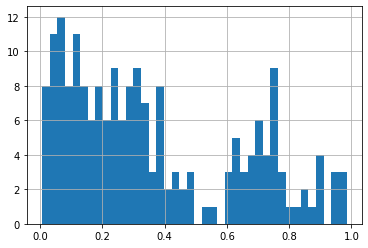

In [60]:
# A histogram of probabilities.  Why not?
pred_prob.hist(bins=40)

### AUC and ROC calculation

In [61]:
# AUC calculation
metrics.roc_auc_score(y_test, pred_prob)

0.8502415458937198

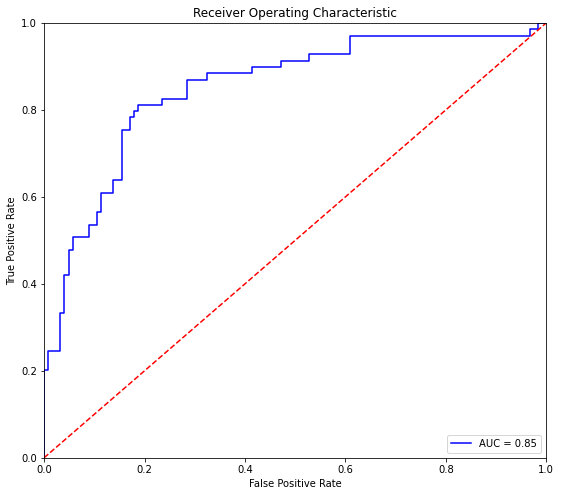

In [62]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.007175
1,1.000000,0.983740,0.012744
2,0.985507,0.983740,0.013068
3,0.985507,0.967480,0.018312
4,0.971014,0.967480,0.021612
5,0.971014,0.609756,0.133697
6,0.927536,0.609756,0.142601
7,0.927536,0.528455,0.161013
8,0.913043,0.528455,0.178360
9,0.913043,0.471545,0.201957


#### Format the confusion matrix for readability

In [64]:
cm_clean = pd.DataFrame(cm, index = np.unique(y_test), columns = np.unique(pred))
cm_clean.index = pd.MultiIndex.from_arrays([['Actual'] * len(cm_clean.index), cm_clean.index], names=(None,None))
cm_clean.columns = pd.MultiIndex.from_arrays([['Predicted'] * len(cm_clean.columns), cm_clean.columns], names=(None,None))
cm_clean

Predicted    
                 0   1
Actual 0       109  14
       1        29  40

### Create model using the sklearn library

In [65]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7760416666666666


In [66]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

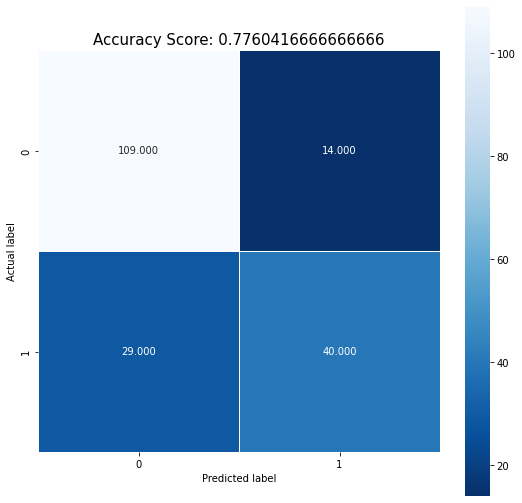

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

***
### End here
***

***
## Visualizing Logistic Regression

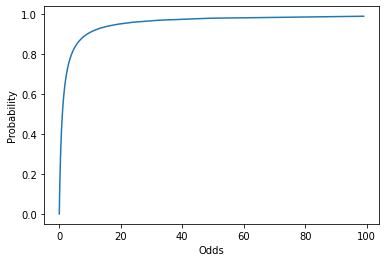

In [68]:
# Plotting Probability vs Odds

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Probability': np.arange(0,1, 0.01), \
                   'Odds':np.arange(0,1., 0.01) / \
                   (1-np.arange(0,1., 0.01)) })
sns.lineplot(data = df, x = 'Odds', y = 'Probability');

/opt/conda/envs/mggy8413/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


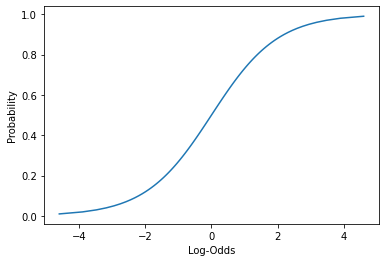

In [69]:
# Plotting log-odds
sns.lineplot(data = df, x = np.log(df['Odds']), \
             y = 'Probability',)
plt.xlabel("Log-Odds");

## Generating correlated variables


Correlation matrix
           x         y
x  1.000000  0.799356
y  0.799356  1.000000
                x           y
count  100.000000  100.000000
mean     1.841104    3.877932
std      0.986845    1.517855
min     -0.377974   -1.622984
25%      1.283809    2.944827
50%      1.841760    3.914277
75%      2.504359    4.791972
max      4.731623    7.491824

 LinregressResult(slope=1.2294795175448414, intercept=1.6143330453560218, rvalue=0.7993555839912965, pvalue=2.087939303355455e-23, stderr=0.09335558051973486)


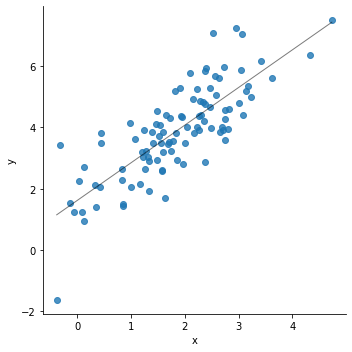

In [70]:
### Generating correlated variables
### Specify the mean of the two variables (mean),
### Then the correlation between them (corr),
### and finally, the standard deviation of each of them (stdev).
### Also specify the number of observations needed (size).

### Update the below three lines
mean = np.array([2,4])
corr = np.array([.75])
stdev = np.array([1, 1.5])
size = 100

### Generate the nu,bers
cov = np.prod(stdev)*corr
cov_matrix = np.array([[stdev[0]**2, cov],
                      [cov, stdev[1]**2]], dtype = 'float')

df = np.random.multivariate_normal(mean= mean, cov=cov_matrix, size=size)
df = pd.DataFrame(df, columns = ['x', 'y'])
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":1,"alpha": .5, "color":"black"}, ci=1)
print('Correlation matrix\n',df.corr())
print(df.describe())
print('\n', stats.linregress(x = df['x'], y = df['y']))

Correlation matrix
           x         y
x  1.000000  0.952852
y  0.952852  1.000000
                x           y
count  100.000000  100.000000
mean     1.871985    3.790328
std      1.111433    1.730344
min     -1.617199   -1.155251
25%      1.201281    2.779882
50%      1.766116    3.705206
75%      2.643829    5.062728
max      4.397531    7.480398

 LinregressResult(slope=1.4834563450821474, intercept=1.013320006034911, rvalue=0.9528524270856542, pvalue=1.4725286051870146e-52, stderr=0.04772000400309797)


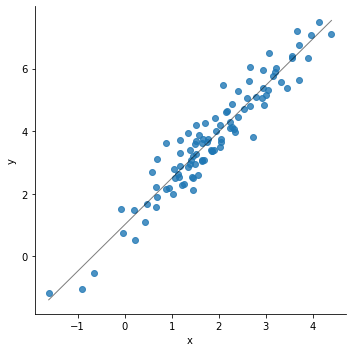

In [71]:
### Update the below three lines
mean = np.array([2,4])
corr = np.array([.95])
stdev = np.array([1, 1.5])
size = 100

### Generate the numbers
cov = np.prod(stdev)*corr
cov_matrix = np.array([[stdev[0]**2, cov],
                      [cov, stdev[1]**2]], dtype = 'float')

df = np.random.multivariate_normal(mean= mean, cov=cov_matrix, size=size)
df = pd.DataFrame(df, columns = ['x', 'y'])
# sns.scatterplot(data=df, x = df.iloc[:,0], y=df.iloc[:,1])
sns.lmplot(data=df, x = "x", y="y", line_kws={"lw":1,"alpha": .5, "color":"black"},ci=1)
print('Correlation matrix\n',df.corr())
print(df.describe())
print('\n', stats.linregress(x = df['x'], y = df['y']))

In [72]:
model2 = sm.OLS(endog = df.y, exog = sm.add_constant(df.x), hasconst=True).fit()
model2.mse_resid**.5
model2.summary()

/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     966.4
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.47e-52
Time:                        23:13:54   Log-Likelihood:                -76.964
No. Observations:                 100   AIC:                             157.9
Df Residuals:                      98   BIC:                             163.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0133      0.104      9.767      0.000       0.807       1.219
x              1.4835      0.048     31.087      0.000       1.389       1.578
==============================================================================
Omnibus:                        2.878   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.768
Skew:                           0.403   Prob(JB):                        0.251
Kurtosis:                       2.873   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""